## IMPORT NECESSARY LIBRARIES

In [1]:
import os
import cv2
from imutils import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import Normalizer



In [2]:
datapath =r"F:\Dataset\Sign pics"

## READ DATA

In [3]:
pathToImage =list(paths.list_images(datapath))
#print(pathToImage)
data =[]
labels =[]
for images in pathToImage:
    label=images.split(os.path.sep)[-2]
    #print(label)
    image =cv2.imread(images)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
    #plt.figure()


In [4]:
#print(labels)

In [5]:
# Total number of images and labels
print('Total number of images',len(data))
print('Total number of labels',len(set(labels)))
print("Labels: ",[X for X in set(labels)])

Total number of images 1203
Total number of labels 3
Labels:  ['A', 'B', 'C']


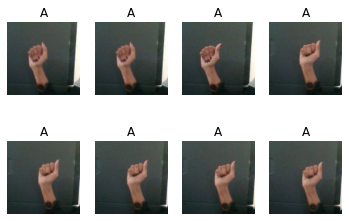

In [6]:
#plt.figure(figsize =(20,20))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(data[i])
    plt.title(labels[i])
    plt.axis('off')

In [7]:
blur_img =[]
clear_image =[]
for img in data:
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    Gaussain_blur =cv2.GaussianBlur(gray,(5,5),2) 
    th3=cv2.adaptiveThreshold(Gaussain_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret,res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel, iterations=1)
    #dilation = cv2.erode(closing, kernel, iterations=1)
    img_erosion = cv2.erode(img, kernel, iterations=1)  
    img_dilation = cv2.dilate(img, kernel, iterations=1)  
    cv2.imshow('Input', img)  
    cv2.imshow('Dilation', img_dilation)  
    clear_image.append(closing)       
    blur_img.append(Gaussain_blur)
    
    

In [8]:
print(ret)

0.0


In [9]:
print(res)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255   0 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


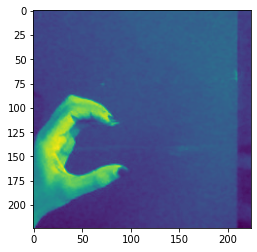

In [10]:
plt.imshow(gray)

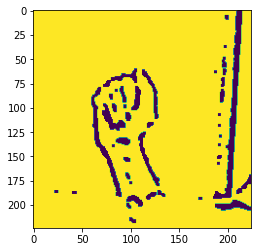

In [11]:
plt.imshow(clear_image[1])

In [12]:
clear_image[1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Gaussian blur image

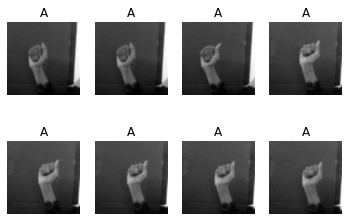

In [13]:
#plt.figure(figsize =(20,20))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(blur_img[i],cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
    
    
    

## clear image

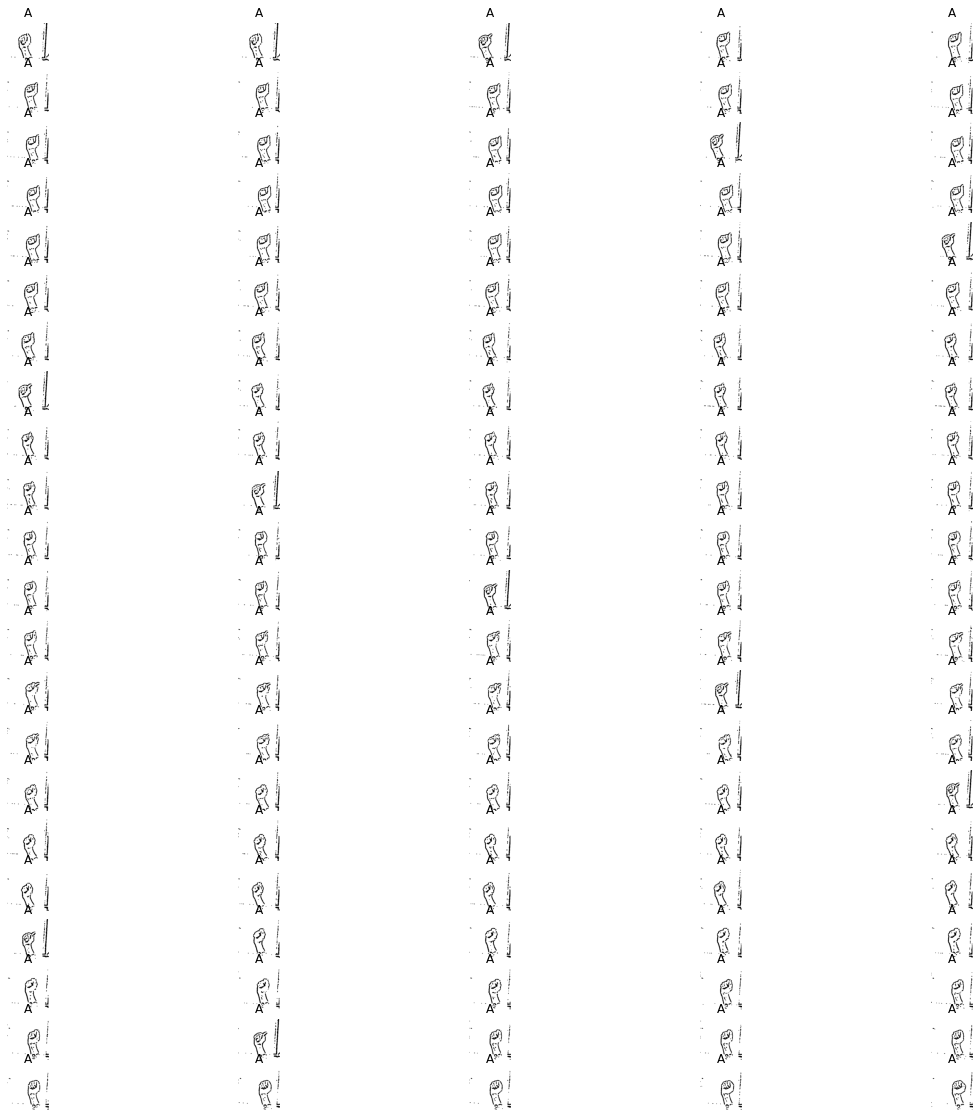

In [14]:
plt.figure(figsize =(20,20))
for i in range(110):
    plt.subplot(22, 5, i + 1)
    plt.imshow(clear_image[i],cmap ="gray")
    plt.title(labels[i])
    plt.axis('off')

In [15]:
data =np.array(clear_image)
labels =np.array(labels)


## SPLITTING DATA 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size =0.2,stratify =labels,random_state =42)

## SHAPE OF TRAINING AND TESTING DATA

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(962, 224, 224)
(962,)
(241, 224, 224)
(241,)
